In [3]:
import matplotlib
import matplotlib.pyplot as plt  # importar a bilioteca pyplot para fazer gráficos
from matplotlib import colors
#Comandos opcionais para formatar gráfico
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 12}	
lines = {'linewidth' : 3.0}
figure = {'figsize' : [6.0, 6/1.6]}
matplotlib.rc('font', **font)
matplotlib.rc('lines', **lines)
matplotlib.rc('figure', **figure)

import numpy as np   # importar a biblioteca Numpy para lidar com matrizes
import pandas as pd   # importa bilioteca pandas para  lidar com processamento de dados
import os #com
import glob2 as glob
from scipy.optimize import curve_fit # pacote para ajuste de curvas
# navegar pelas pastas

In [4]:
file_list = sorted(glob.glob(os.path.join('*')))
print(file_list)

['F088_exp5.ipynb', 'Oscilador_Relaxação_R_97600_100Hz.dat', 'Oscilador_ponte_Wien.JPG', 'Oscilador_ponte_Wien.dat', 'Oscilador_ponte_Wien_componentes.txt', 'Oscilador_relaxacao_100Hz_2kHz', 'Roteiro_osciladores.pdf', 'Untitled.ipynb', 'biestavel.dat', 'dados_osciladores.zip', 'gerador_onda_triangular.dat', 'gerador_pulso.dat', 'qucs_nosso', 'qucs_prof', 'relax_image.png', 'relax_image2.png']


### Biestável

In [5]:
file = 'biestavel.dat'
df = pd.read_csv(file,sep='\t') # DataFrame segundo Pandasdf
df.columns = ['time(s)','CH1(V)','CH2(V)']
df.head() # preview the first few rows

,time(s),CH1(V),CH2(V)
0,0.00001,-9.6,13.6
1,0.00002,-9.6,13.6
2,0.00003,-9.4,13.6
3,0.00004,-9.4,13.6
4,0.00005,-9.4,13.8


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


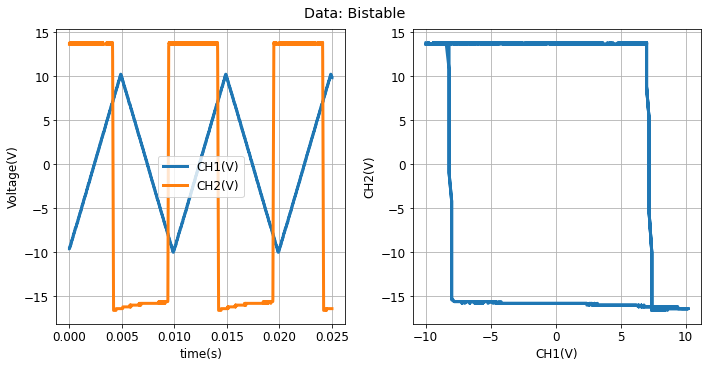

In [6]:
fig,ax = plt.subplots(1,2, figsize=(10,5))

#G_pb = 20*np.log10(np.abs((dfpb['CH2(V)'])/(dfpb['CH1(V)'])))
ax[0].plot( df['time(s)'], df['CH1(V)'], lw=3, label='CH1(V)')
ax[0].plot( df['time(s)'], df['CH2(V)'], lw=3, label='CH2(V)')
ax[0].grid(True)
#ax0.set_xscale('log')
ax[0].set_xlabel('time(s)')
ax[0].set_ylabel('Voltage(V)')

#handles, labels = ax3.get_legend_handles_labels()
ax[0].legend()

ax[1].plot( df['CH1(V)'],  df['CH2(V)'], lw=3, label='CH1(V)')
#ax[1].plot( df['time(s)'], df['CH2(V)'], lw=3, label='CH2(V)')
ax[1].grid(True)
#ax0.set_xscale('log')
ax[1].set_xlabel('CH1(V)')
ax[1].set_ylabel('CH2(V)')



plt.tight_layout()
#----
st = fig.suptitle('Data: Bistable')
# shift subplots down:
st.set_y(1.02)

### Gerador de pulsos

In [7]:
file = 'gerador_pulso.dat'
df2 = pd.read_csv(file,sep='\t') # DataFrame segundo Pandasdf
df2.columns = ['time(s)','CH1(V)','CH2(V)', 'CH3(V)']
df2.head() # preview the first few rows

,time(s),CH1(V),CH2(V),CH3(V)
0,0.00001,-9.6,-15.0,5.2
1,0.00002,-9.6,-14.8,5.2
2,0.00003,-9.4,-15.0,5.2
3,0.00004,-9.4,-14.8,5.2
4,0.00005,-9.4,-15.0,5.2


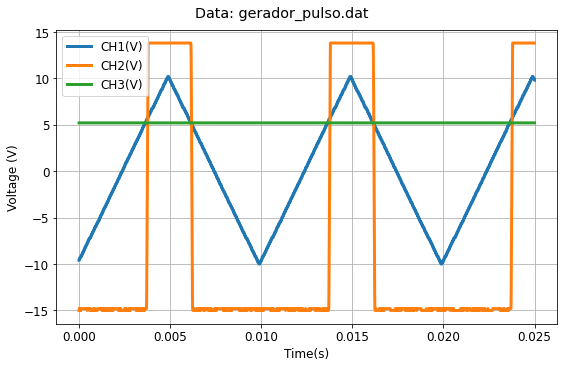

In [8]:
#----
plt.ion()
fig,ax = plt.subplots(figsize=(8,5))
#------------------------
ax0=ax
#--
ax0.plot(df2['time(s)'],df2['CH1(V)'],'-', label = df2.columns[1])
ax0.plot(df2['time(s)'],df2['CH2(V)'],'-', label = df2.columns[2])
ax0.plot(df2['time(s)'],df2['CH3(V)'],'-', label = df2.columns[3])

#--
ax0.grid(True)
ax0.set_xlabel('Time(s)')
ax0.set_ylabel('Voltage (V)')
#------------------------
plt.tight_layout()
#----
st = fig.suptitle('Data: '+file)
ax0.legend()
# shift subplots down:
st.set_y(1.02)
#---
#plt.savefig('ch1xch2'+'_fig.png', bbox_inches="tight")

### Oscilador de relaxação

In [16]:
file = 'Oscilador_Relaxação_R_97600_100Hz.dat'
df3 = pd.read_csv(file,sep='\t') # DataFrame segundo Pandasdf
df3.columns = ['time(s)','CH1(V)','CH2(V)', 'CH3(V)']
df3.head() # preview the first few rows
file1 = 'Oscilador_relaxacao_100Hz_2kHz/dados.xlsx'
df4 = pd.read_excel(file1) # DataFrame segundo Pandasdf
#df4.columns = ['time(s)','CH1(V)','CH2(V)', 'CH3(V)']
df4.head() # preview the first few rows

,Arquivo,R_var (kohm),T (ms)
0,TEK0025.JPG,97.6,0.010079
1,TEK0026.JPG,92.8,0.009583
2,TEK0027.JPG,87.6,0.009046
3,TEK0028.JPG,82.6,0.008530
4,TEK0029.JPG,77.6,0.008014


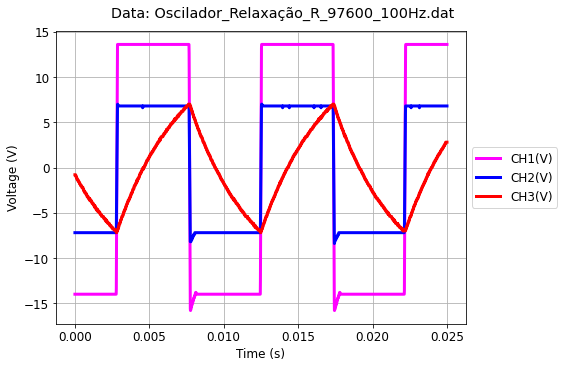

In [22]:
#----
plt.ion()
#fig,ax = plt.subplots(1,2, figsize=(12,5))
fig, ax = plt.subplots(figsize=(8,5))
#------------------------
#ax0=ax[0]
ax0 = ax
#--
ax0.plot(df3['time(s)'],df3['CH1(V)'],'-', label = df3.columns[1], color = 'magenta')
ax0.plot(df3['time(s)'],df3['CH2(V)'],'-', label = df3.columns[2], color = 'blue')
ax0.plot(df3['time(s)'],df3['CH3(V)'],'-', label = df3.columns[3], color = 'red')

#--
ax0.grid(True)
ax0.set_xlabel('Time (s)')
ax0.set_ylabel('Voltage (V)')
#------------------------
#ax0=ax[1]
#--
#ax0.plot(df4['R_var (kohm)'],df4['T (ms)'],'-')

#--
#ax0.grid(True)
#ax0.set_xlabel('R_var (kOhm)')
#ax0.set_ylabel('Period (s)')

handles, labels = ax.get_legend_handles_labels()
ax.legend(loc='center left',bbox_to_anchor=(1,0.5))

plt.tight_layout()
#----
st = fig.suptitle('Data: '+file)
# shift subplots down:
st.set_y(1.02)
#---
#plt.savefig('bode_plot'+'_fig.png', bbox_inches="tight")

In [35]:
from lmfit import Model, Parameters

def period(R, C):
    return 2*R*C*np.log(3)

mod = Model(period)
print('parameter names: {}'.format(mod.param_names))
print('independent variables: {}'.format(mod.independent_vars))

parameter names: ['C']
independent variables: ['R']


In [39]:
params = mod.make_params(C = 10**-7)
result = mod.fit(df4['T (ms)']*10**-3, params, R=df4['R_var (kohm)']*10**3)

print(result.fit_report(min_correl=0.25))
dic_result = result.params.valuesdict()
print(dic_result)
C = dic_result['C']

[[Model]]
    Model(period)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 22
    # variables        = 1
    chi-square         = 9.1306e-08
    reduced chi-square = 4.3479e-09
    Akaike info crit   = -422.602040
    Bayesian info crit = -421.510998
[[Variables]]
    C:  4.5259e-08 +/- 1.1506e-10 (0.25%) (init = 1e-07)
OrderedDict([('C', 4.52593055520606e-08)])


In [41]:
C

4.52593055520606e-08

### Gerador de Onda triangular

In [19]:
file = 'gerador_onda_triangular.dat '
df5 = pd.read_csv(file,sep='\t') # DataFrame segundo Pandasdf
df5.columns = ['time(s)','CH1(V)','CH2(V)']
df5.head() # preview the first few rows

,time(s),CH1(V),CH2(V)
0,0.000002,1.0,-7.0
1,0.000004,0.4,-7.0
2,0.000006,-0.4,-7.0
3,0.000008,-1.2,-6.8
4,0.000010,-2.2,-7.0


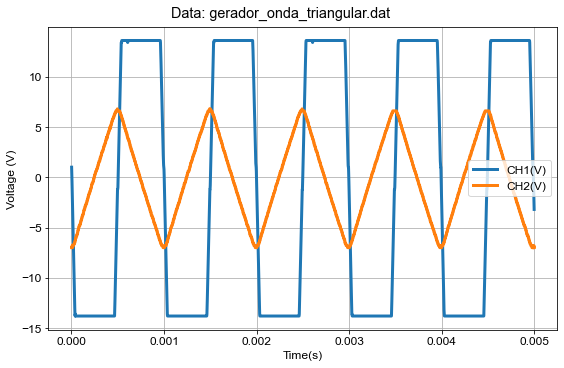

In [20]:
#----
plt.ion()
fig,ax = plt.subplots(figsize=(8,5))
#------------------------
ax0=ax
#--
ax0.plot(df5['time(s)'],df5['CH1(V)'],'-', label = df5.columns[1])
ax0.plot(df5['time(s)'],df5['CH2(V)'],'-', label = df5.columns[2])

#--
ax0.grid(True)
ax0.set_xlabel('Time(s)')
ax0.set_ylabel('Voltage (V)')
#------------------------
plt.tight_layout()
#----
st = fig.suptitle('Data: '+file)
ax0.legend()
# shift subplots down:
st.set_y(1.02)
#---
#plt.savefig('ch1xch2'+'_fig.png', bbox_inches="tight")

### Onda senoidal - ponte de Wien

In [29]:
file = 'Oscilador_ponte_Wien.dat'
df6 = pd.read_csv(file,sep='\t') # DataFrame segundo Pandasdf
df6.columns = ['time(s)','CH1(V)']
df6.head() # preview the first few rows

,time(s),CH1(V)
0,0.000002,6.8
1,0.000004,7.0
2,0.000006,7.2
3,0.000008,7.4
4,0.000010,7.6


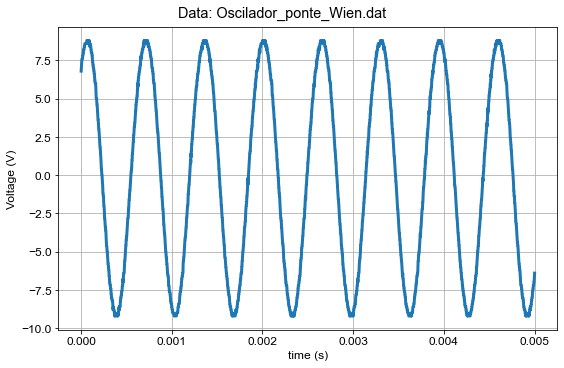

In [30]:
#----
plt.ion()
fig,ax = plt.subplots(figsize=(8,5))
#------------------------
ax0=ax
#--
ax0.plot(df6['time(s)'],df6['CH1(V)'],'-', label = df6.columns[1])

#--
ax0.grid(True)
ax0.set_xlabel('time (s)')
ax0.set_ylabel('Voltage (V)')
#------------------------

#------------------
plt.tight_layout()
#----
st = fig.suptitle('Data: '+file)
# shift subplots down:
st.set_y(1.02)
#---
#plt.savefig(file+'_fig.png', bbox_inches="tight")

In [43]:
Hminus = (9.78+2.89)/(9.78+27.1+2.89)
freq = 1/(2*np.pi*993*100*10**-9)
freq

1602.7688126072037